In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import glob
import operator
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
TARGET = 'target'

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
submission = pd.read_csv('../input/sample_submission.csv')


In [4]:
train.head(3)

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,-0.227027,0.575964,1.541908,1.745286,-0.624271,3.600958,1.176489,-0.182776,-0.228391,1.682263,-0.833236,-4.377688,-5.372410,-0.477742,-0.179005,-0.516475,0.127391,-0.857591,-0.461500,2.160303,-2.118371,0.515493,-1.201493,-0.027377,-1.154024,0.753204,-0.179651,-0.807341,-1.663626,0.893806,...,-1.829848,2.347131,0.082462,-1.012654,0.593752,2.904654,-0.428974,-0.919979,2.849575,-0.906744,0.729459,0.386140,0.319814,-0.407682,-0.170667,-1.242919,-1.719046,-0.132395,-0.368991,-5.112553,-2.085988,-0.897257,1.080671,-0.273262,0.342824,0.640177,-0.415298,-0.483126,-0.080799,2.416224,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,0.783980,-1.280579,-1.003480,-7.753201,-1.320547,0.919078,-1.036068,0.030213,0.910172,-0.905345,0.646641,-0.465291,-0.531735,-0.756781,0.193724,0.224277,-0.474412,1.885805,0.205439,-6.481422,1.035620,-0.453623,0.375936,-0.320670,-0.144646,-0.220129,0.577826,-0.360512,-0.600107,0.008111,...,0.982205,-1.161978,0.532269,1.133215,0.003503,-1.390962,0.158572,0.143794,-0.317185,1.017192,-0.395342,-0.642357,-0.627209,0.257271,-1.461564,0.325613,1.628369,0.640040,0.750735,1.164573,0.900373,0.063489,0.948158,0.273014,-1.269147,-0.251101,-2.271731,-0.044167,-0.443766,-1.144794,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.28855

In [5]:
print("Shape of train data: {}".format(train.shape))
print("Shape of test data: {}".format(test.shape))

Shape of train data: (262144, 258)
Shape of test data: (131073, 257)


In [6]:
train.drop('id',axis=1,inplace = True)
test.drop('id',axis=1,inplace = True)

**Target Distribution**

1    131131
0    131013
Name: target, dtype: int64


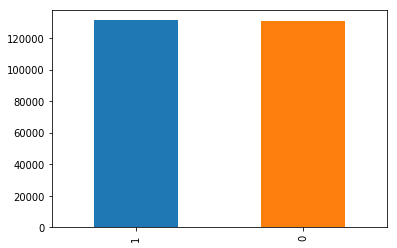

In [7]:
target_distribution = train.target.value_counts()
print(target_distribution)
target_distribution.plot('bar')

In [8]:
target,features = train.target,train.drop('target',axis = 1)

In [9]:
def variable_uniqueness_rate(df):
	uniquness_rate = {}
	for col in df.columns:
		rate = df[col].value_counts(normalize=True, dropna=False).values[0]
		uniquness_rate.update({col:rate*100})
	uniquness_rate = sorted(uniquness_rate.items(), key=operator.itemgetter(1),reverse = True)
	return uniquness_rate

def get_feature_unique(df):
	nunique_map = {}
	for col in df.columns:
		nunique_map.update({col:df[col].nunique()})
	nunique_map = sorted(nunique_map.items(), key=operator.itemgetter(1),reverse = True)
	return nunique_map

def get_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.to_dict()

In [10]:
variable_unique_rate = variable_uniqueness_rate(features)
unique_features = get_feature_unique(features)

In [17]:
unique_features

[('skinny-ultramarine-cat-fimbus', 255057),
 ('chewy-bistre-buzzard-expert', 254991),
 ('hazy-tan-schnauzer-hint', 254947),
 ('snoopy-heliotrope-squid-dataset', 254824),
 ('squeaky-khaki-lionfish-distraction', 254815),
 ('cranky-champagne-jackal-gaussian', 254809),
 ('cozy-ochre-gorilla-gaussian', 254806),
 ('queasy-peach-bison-sumble', 254795),
 ('skimpy-copper-fowl-grandmaster', 254780),
 ('wiggy-denim-retriever-distraction', 254777),
 ('breezy-myrtle-loon-discard', 254775),
 ('nippy-burgundy-beagle-novice', 254768),
 ('nerdy-indigo-wolfhound-sorted', 254752),
 ('sleazy-russet-iguana-unsorted', 254752),
 ('droopy-amethyst-dachshund-hint', 254752),
 ('flimsy-magnolia-gopher-learn', 254747),
 ('hasty-pink-iguana-noise', 254737),
 ('snappy-purple-bobcat-important', 254733),
 ('pasty-sepia-eel-noise', 254732),
 ('flaky-cream-peccary-sorted', 254731),
 ('lanky-aqua-bullfrog-important', 254731),
 ('wheezy-myrtle-mandrill-entropy', 254718),
 ('craggy-maroon-civet-grandmaster', 254715),
 ('w

In [16]:
variable_unique_rate

[('wheezy-copper-turtle-magic', 0.217437744140625),
 ('nippy-pumpkin-rhinoceros-entropy', 0.002288818359375),
 ('hazy-emerald-cuttlefish-unsorted', 0.0019073486328125),
 ('stealthy-scarlet-hound-fepid', 0.0019073486328125),
 ('snappy-gamboge-caterpillar-dummy', 0.0019073486328125),
 ('snoopy-red-zonkey-unsorted', 0.0019073486328125),
 ('clammy-scarlet-emu-important', 0.0019073486328125),
 ('gloppy-denim-ostrich-gaussian', 0.0019073486328125),
 ('shaggy-sapphire-eel-unsorted', 0.0019073486328125),
 ('bluesy-amethyst-octopus-gaussian', 0.0019073486328125),
 ('lovely-plum-goat-novice', 0.0019073486328125),
 ('blurry-buff-hyena-entropy', 0.0019073486328125),
 ('muggy-smalt-axolotl-pembus', 0.00152587890625),
 ('dorky-peach-sheepdog-ordinal', 0.00152587890625),
 ('slimy-seashell-cassowary-goose', 0.00152587890625),
 ('snazzy-harlequin-chicken-distraction', 0.00152587890625),
 ('frumpy-smalt-mau-ordinal', 0.00152587890625),
 ('stealthy-beige-pinscher-golden', 0.00152587890625),
 ('chummy-cre

In [11]:
train_dummy = pd.get_dummies(features['wheezy-copper-turtle-magic'], prefix= 'whz')
test_dummy = pd.get_dummies(test['wheezy-copper-turtle-magic'], prefix= 'whz')

In [12]:
features.drop('wheezy-copper-turtle-magic',axis = 1,inplace = True)
test.drop('wheezy-copper-turtle-magic',axis = 1,inplace = True)

In [13]:
features = pd.merge(features,train_dummy,left_index=True,right_index=True)
test = pd.merge(test,test_dummy,left_index=True,right_index=True)


In [15]:
print("Shape of train data: {}".format(features.shape))
print("Shape of test data: {}".format(test.shape))

Shape of train data: (262144, 767)
Shape of test data: (131073, 767)
